# Week 4 Individual Assignment

#### *Jacob Basinger*

In this assignment I will be updating my census analysis by incorporating a temporal aspect to the data.  Specifically, I will be looking at how NYC populations have changed over time within census tracts.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

First I imported the libraries.  Then, I added the data on census tract geographies that I obtained from the NYC open data portal.

In [2]:
censustracts = gpd.read_file('../currentdata/nyctracts.json')

In [3]:
censustracts.head()

,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,geometry
0,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881944,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,2,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,9.723121e+05,4754.494868,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,3,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,3.315114e+06,8568.089568,"MULTIPOLYGON (((-73.98364 40.70960, -73.98450 ..."
3,4,5,1,Manhattan,000500,1000500,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000500,9.083181e+06,32641.900715,"MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ..."
4,5,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,2.582705e+06,6976.286329,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."


As you can see above and in the plot below, this data provides the geometric information for all the census tracts in NYC (excluding the water ones).

In [4]:
censustracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2325 non-null   int64   
 1   CTLabel        2325 non-null   object  
 2   BoroCode       2325 non-null   object  
 3   BoroName       2325 non-null   object  
 4   CT2020         2325 non-null   object  
 5   BoroCT2020     2325 non-null   object  
 6   CDEligibil     0 non-null      object  
 7   NTAName        2325 non-null   object  
 8   NTA2020        2325 non-null   object  
 9   CDTA2020       2325 non-null   object  
 10  CDTANAME       2325 non-null   object  
 11  GEOID          2325 non-null   object  
 12  Shape__Area    2325 non-null   float64 
 13  Shape__Length  2325 non-null   float64 
 14  geometry       2325 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(11)
memory usage: 272.6+ KB


<AxesSubplot:>

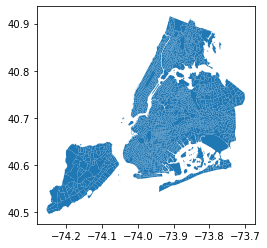

In [5]:
censustracts.plot()

Next I needed to import the census data. The NYC open data portal has an excel file available that contains the 2010 and 2020 census population data, as well as columns with the population change information already calculated. I began by importing the whole spreadsheet, specifying which row was the header.

In [6]:
ctdata = pd.read_excel('../currentdata/nyc_censusdata_2020_2010.xlsx', sheet_name = '2010, 2020, and Change', header=3, index_col=0)

In [7]:
ctdata.head(10)

,GeoType,Borough,GeoID,BCT2020,Name,CD Type,NTA Type,Pop_10,Pop_10P,HHPop_10,...,ONH_Ch,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh
Orig Order,,,,,,,,,,,,,,,,,,,,,
1,NYC,New York City,0,NaN,NYC,NaN,NaN,8175133,100.0,7989603,...,65569,84.0,151283,101.8,247573,7.3,260664,8.4,-13091,-5.0
2,Boro,Manhattan,1,NaN,Manhattan,NaN,NaN,1585873,100.0,1518500,...,8230,104.4,33032,110.3,66836,7.9,53936,7.1,12900,15.5
3,Boro,Bronx,2,NaN,Bronx,NaN,NaN,1385108,100.0,1338398,...,7372,59.0,12408,77.7,35134,6.9,39001,8.1,-3867,-13.6
4,Boro,Brooklyn,3,NaN,Brooklyn,NaN,NaN,2504700,100.0,2469091,...,21675,136.3,73160,182.9,77361,7.7,92948,10.1,-15587,-18.7
5,Boro,Queens,4,NaN,Queens,NaN,NaN,2230722,100.0,2202722,...,26252,65.8,28005,49.9,61206,7.3,67093,8.6,-5887,-10.7
6,Boro,Staten Island,5,NaN,Staten Island,NaN,NaN,468730,100.0,460892,...,2040,109.7,4678,70.5,7036,4.0,7686,4.6,-650,-5.8
7,CD,Manhattan,101,NaN,Manhattan Community District 1,CD,NaN,60978,100.0,56486,...,392,114.3,2427,136.3,7838,23.0,6903,23.4,935,20.4
8,CD,Manhattan,102,NaN,Manhattan Community District 2,CD,NaN,90016,100.0,84583,...,427,106.5,2043,96.8,2207,3.9,47,0.1,2160,39.6
9,CD,Manhattan,103,NaN,Manhattan Community District 3,CD,NaN,163277,100.0,154987,...,708,98.7,2000,65.9,6614,8.7,4236,5.9,2378,61.4


In [8]:
ctdata.tail()

,GeoType,Borough,GeoID,BCT2020,Name,CD Type,NTA Type,Pop_10,Pop_10P,HHPop_10,...,ONH_Ch,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh
Orig Order,,,,,,,,,,,,,,,,,,,,,
2662,CT2020,Staten Island,36085030302,5030302.0,NaN,NaN,NaN,6369,100.0,6369,...,39,95.1,44,38.6,76,3.8,62,3.2,14,17.3
2663,CT2020,Staten Island,36085031901,5031901.0,NaN,NaN,NaN,3265,100.0,3265,...,5,20.0,60,88.2,21,1.9,19,1.8,2,5.0
2664,CT2020,Staten Island,36085031902,5031902.0,NaN,NaN,NaN,4848,100.0,4832,...,53,165.6,85,70.2,135,7.8,188,11.9,-53,-35.8
2665,CT2020,Staten Island,36085032300,5032300.0,NaN,NaN,NaN,1250,100.0,1249,...,17,242.9,30,120.0,26,5.5,13,2.9,13,54.2
2666,CT2020,Staten Island,36085990100,5990100.0,NaN,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [9]:
ctdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1 to 2666
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GeoType     2666 non-null   object 
 1   Borough     2666 non-null   object 
 2   GeoID       2666 non-null   object 
 3   BCT2020     2327 non-null   float64
 4   Name        339 non-null    object 
 5   CD Type     71 non-null     object 
 6   NTA Type    262 non-null    float64
 7   Pop_10      2666 non-null   int64  
 8   Pop_10P     2575 non-null   float64
 9   HHPop_10    2666 non-null   int64  
 10  HHPop_10P   2559 non-null   float64
 11  GQ_10       2666 non-null   int64  
 12  GQ_10P      1538 non-null   float64
 13  InstGQ_10   2666 non-null   int64  
 14  InstGQ_10P  548 non-null    float64
 15  AvHHSz_10   2559 non-null   float64
 16  AvHHSz_10P  0 non-null      float64
 17  PopU18_10   2666 non-null   int64  
 18  PopU18_10P  2553 non-null   float64
 19  Hsp_10      2666 non-null  

I then trimmed the data to only include the temporal change data (located in columns 67-96).

In [10]:
list(ctdata)

['GeoType',
 'Borough',
 'GeoID',
 'BCT2020',
 'Name',
 'CD Type',
 'NTA Type',
 'Pop_10',
 'Pop_10P',
 'HHPop_10',
 'HHPop_10P',
 'GQ_10',
 'GQ_10P',
 'InstGQ_10',
 'InstGQ_10P',
 'AvHHSz_10',
 'AvHHSz_10P',
 'PopU18_10',
 'PopU18_10P',
 'Hsp_10',
 'Hsp_10P',
 'WNH_10',
 'WNH_10P',
 'BNH_10',
 'BNH_10P',
 'ANH_10',
 'ANH_10P',
 'ONH_10',
 'ONH_10P',
 'NH2pl_10',
 'NH2pl_10P',
 'HUnits_10',
 'HUnits_10P',
 'OcHU_10',
 'OcHU_10P',
 'VacHU_10',
 'VacHU_10P',
 'Pop_20',
 'Pop_20P',
 'HHPop_20',
 'HHPop_20P',
 'GQ_20',
 'GQ_20P',
 'InstGQ_20',
 'InstGQ_20P',
 'AvHHSz_20',
 'AvHHSz_20P',
 'PopU18_20',
 'PopU18_20P',
 'Hsp_20',
 'Hsp_20P',
 'WNH_20',
 'WNH_20P',
 'BNH_20',
 'BNH_20P',
 'ANH_20',
 'ANH_20P',
 'ONH_20',
 'ONH_20P',
 'NH2pl_20',
 'NH2pl_20P',
 'HUnits_20',
 'HUnits_20P',
 'OcHU_20',
 'OcHU_20P',
 'VacHU_20',
 'VacHU_20P',
 'Pop_Ch',
 'Pop_PCh',
 'HHPop_Ch',
 'HHPop_PCh',
 'GQ_Ch',
 'GQ_PCh',
 'InstGQ_Ch',
 'InstGQ_PCh',
 'AvHHSz_Ch',
 'AvHHSz_PCh',
 'PopU18_Ch',
 'PopU18_PCh',


In [11]:
temporalcolumns = ['GeoType',
 'Borough',
 'GeoID',
 'Pop_Ch',
 'Pop_PCh',
 'HHPop_Ch',
 'HHPop_PCh',
 'GQ_Ch',
 'GQ_PCh',
 'InstGQ_Ch',
 'InstGQ_PCh',
 'AvHHSz_Ch',
 'AvHHSz_PCh',
 'PopU18_Ch',
 'PopU18_PCh',
 'Hsp_Ch',
 'Hsp_PCh',
 'WNH_Ch',
 'WNH_PCh',
 'BNH_Ch',
 'BNH_PCh',
 'ANH_Ch',
 'ANH_PCh',
 'ONH_Ch',
 'ONH_PCh',
 'NH2pl_Ch',
 'NH2pl_PCh',
 'HUnits_Ch',
 'HUnits_PCh',
 'OcHU_Ch',
 'OcHU_PCh',
 'VacHU_Ch',
 'VacHU_PCh']
temporaldata = ctdata[temporalcolumns]
temporaldata.head()

,GeoType,Borough,GeoID,Pop_Ch,Pop_PCh,HHPop_Ch,HHPop_PCh,GQ_Ch,GQ_PCh,InstGQ_Ch,...,ONH_Ch,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh
Orig Order,,,,,,,,,,,,,,,,,,,,,
1,NYC,New York City,0,629057,7.7,595859,7.5,33198,17.9,-17998,...,65569,84.0,151283,101.8,247573,7.3,260664,8.4,-13091,-5.0
2,Boro,Manhattan,1,108378,6.8,98216,6.5,10162,15.1,-4639,...,8230,104.4,33032,110.3,66836,7.9,53936,7.1,12900,15.5
3,Boro,Bronx,2,87546,6.3,81441,6.1,6105,13.1,-10401,...,7372,59.0,12408,77.7,35134,6.9,39001,8.1,-3867,-13.6
4,Boro,Brooklyn,3,231374,9.2,221037,9.0,10337,29.0,1033,...,21675,136.3,73160,182.9,77361,7.7,92948,10.1,-15587,-18.7
5,Boro,Queens,4,174742,7.8,167645,7.6,7097,25.3,-2945,...,26252,65.8,28005,49.9,61206,7.3,67093,8.6,-5887,-10.7


Finally, I cut down the rows to only include the census tract information, where before there were also City, Borough, Community District, and Neighborhood Tabulation Area categories. To do so I created a new dataframe with only those rows where the GeoType is CT2020 (the census tract label) and labeled it tcdata for temporal change data.

In [12]:
tcdata = temporaldata[temporaldata['GeoType'] == 'CT2020']

In [13]:
tcdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 340 to 2666
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GeoType     2327 non-null   object 
 1   Borough     2327 non-null   object 
 2   GeoID       2327 non-null   object 
 3   Pop_Ch      2327 non-null   int64  
 4   Pop_PCh     2267 non-null   float64
 5   HHPop_Ch    2327 non-null   int64  
 6   HHPop_PCh   2259 non-null   float64
 7   GQ_Ch       2327 non-null   int64  
 8   GQ_PCh      1259 non-null   float64
 9   InstGQ_Ch   2327 non-null   int64  
 10  InstGQ_PCh  329 non-null    float64
 11  AvHHSz_Ch   2243 non-null   float64
 12  AvHHSz_PCh  2259 non-null   float64
 13  PopU18_Ch   2327 non-null   int64  
 14  PopU18_PCh  2253 non-null   float64
 15  Hsp_Ch      2327 non-null   int64  
 16  Hsp_PCh     2253 non-null   float64
 17  WNH_Ch      2327 non-null   int64  
 18  WNH_PCh     2254 non-null   float64
 19  BNH_Ch      2327 non-null

In [14]:
tcdata.head()

,GeoType,Borough,GeoID,Pop_Ch,Pop_PCh,HHPop_Ch,HHPop_PCh,GQ_Ch,GQ_PCh,InstGQ_Ch,...,ONH_Ch,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh
Orig Order,,,,,,,,,,,,,,,,,,,,,
340,CT2020,Bronx,36005000100,-7319,-66.0,27,NaN,-7346,-66.2,-7346,...,-277,-95.8,7,233.3,1,NaN,0,NaN,1,NaN
341,CT2020,Bronx,36005000200,445,10.3,442,10.2,3,60.0,0,...,50,76.9,84,200.0,145,10.0,166,12.3,-21,-21.4
342,CT2020,Bronx,36005000400,769,14.0,767,14.0,2,16.7,0,...,23,33.8,96,181.1,297,15.6,324,18.1,-27,-23.1
343,CT2020,Bronx,36005001600,152,2.7,164,3.0,-12,-5.0,-19,...,35,76.1,67,163.4,128,6.4,117,6.1,11,14.5
344,CT2020,Bronx,36005001901,1821,386.6,1787,379.4,34,NaN,0,...,34,3400.0,69,985.7,852,432.5,805,439.9,47,335.7


In [15]:
tcdata.tail()

,GeoType,Borough,GeoID,Pop_Ch,Pop_PCh,HHPop_Ch,HHPop_PCh,GQ_Ch,GQ_PCh,InstGQ_Ch,...,ONH_Ch,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh
Orig Order,,,,,,,,,,,,,,,,,,,,,
2662,CT2020,Staten Island,36085030302,300,4.7,280,4.4,20,NaN,0,...,39,95.1,44,38.6,76,3.8,62,3.2,14,17.3
2663,CT2020,Staten Island,36085031901,-3,-0.1,-17,-0.5,14,NaN,0,...,5,20.0,60,88.2,21,1.9,19,1.8,2,5.0
2664,CT2020,Staten Island,36085031902,652,13.4,627,13.0,25,156.3,7,...,53,165.6,85,70.2,135,7.8,188,11.9,-53,-35.8
2665,CT2020,Staten Island,36085032300,-17,-1.4,-16,-1.3,-1,-100.0,0,...,17,242.9,30,120.0,26,5.5,13,2.9,13,54.2
2666,CT2020,Staten Island,36085990100,0,NaN,0,NaN,0,NaN,0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


Before combining the data sets, I recognized that the gdf file, censustracts, had its GeoID column in all capital letters so I needed to change that before joining the two based on that column.

In [16]:
censustracts.rename(columns={'GEOID':'GeoID'}, inplace=True)
censustracts.head()

,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GeoID,Shape__Area,Shape__Length,geometry
0,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881944,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,2,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,9.723121e+05,4754.494868,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,3,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,3.315114e+06,8568.089568,"MULTIPOLYGON (((-73.98364 40.70960, -73.98450 ..."
3,4,5,1,Manhattan,000500,1000500,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000500,9.083181e+06,32641.900715,"MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ..."
4,5,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,2.582705e+06,6976.286329,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."


I also decided to remove some of the columns in the censustracts spatial dataset before joining.

In [17]:
list(censustracts)

['OBJECTID',
 'CTLabel',
 'BoroCode',
 'BoroName',
 'CT2020',
 'BoroCT2020',
 'CDEligibil',
 'NTAName',
 'NTA2020',
 'CDTA2020',
 'CDTANAME',
 'GeoID',
 'Shape__Area',
 'Shape__Length',
 'geometry']

In [18]:
columns_to_keep = ['NTAName', 
 'GeoID',
 'Shape__Area',
 'Shape__Length',
 'geometry']

In [19]:
censustracts = censustracts[columns_to_keep]
censustracts.head()

,NTAName,GeoID,Shape__Area,Shape__Length,geometry
0,The Battery-Governors Island-Ellis Island-Libe...,36061000100,1.844391e+06,11022.881944,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,Chinatown-Two Bridges,36061000201,9.723121e+05,4754.494868,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,Lower East Side,36061000202,3.315114e+06,8568.089568,"MULTIPOLYGON (((-73.98364 40.70960, -73.98450 ..."
3,The Battery-Governors Island-Ellis Island-Libe...,36061000500,9.083181e+06,32641.900715,"MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ..."
4,Chinatown-Two Bridges,36061000600,2.582705e+06,6976.286329,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."


In [20]:
print(censustracts['GeoID'].dtypes)

object


In [21]:
print(tcdata['GeoID'].dtypes)

object


Finally, I needed to join this data with the spatial data so that I could map it. To do so I utilized the merge method based on the shared GeoID column, since the FIPS codes are consistent between the two datasets.

First I made sure the GeoID columns were of a consistent datatype. I sorted them based on GeoID, then I converted all of the values to strings so that they would be consistent for the merge.

In [22]:
tcdata = tcdata.sort_values(by='GeoID')
censustracts = censustracts.sort_values(by='GeoID')

In [23]:
censustracts = censustracts.astype({"GeoID": str})

In [24]:
censustracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2325 entries, 310 to 2324
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   NTAName        2325 non-null   object  
 1   GeoID          2325 non-null   object  
 2   Shape__Area    2325 non-null   float64 
 3   Shape__Length  2325 non-null   float64 
 4   geometry       2325 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 109.0+ KB


In [25]:
tcdata = tcdata.astype({"GeoID": str})

In [26]:
tcdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 340 to 2666
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GeoType     2327 non-null   object 
 1   Borough     2327 non-null   object 
 2   GeoID       2327 non-null   object 
 3   Pop_Ch      2327 non-null   int64  
 4   Pop_PCh     2267 non-null   float64
 5   HHPop_Ch    2327 non-null   int64  
 6   HHPop_PCh   2259 non-null   float64
 7   GQ_Ch       2327 non-null   int64  
 8   GQ_PCh      1259 non-null   float64
 9   InstGQ_Ch   2327 non-null   int64  
 10  InstGQ_PCh  329 non-null    float64
 11  AvHHSz_Ch   2243 non-null   float64
 12  AvHHSz_PCh  2259 non-null   float64
 13  PopU18_Ch   2327 non-null   int64  
 14  PopU18_PCh  2253 non-null   float64
 15  Hsp_Ch      2327 non-null   int64  
 16  Hsp_PCh     2253 non-null   float64
 17  WNH_Ch      2327 non-null   int64  
 18  WNH_PCh     2254 non-null   float64
 19  BNH_Ch      2327 non-null

To double check that the columns in both datasets were the same I ran the difference command on the two lists below. The return of 2 shows that it was a success since there should only be two differences in the data just by virtue of the census data having two more rows than the tract data.

In [29]:
len(list(set(tcdata['GeoID']).difference(censustracts['GeoID'])))

2

Now it is time to add the geography to the census data. I kept the censustracts gdf as the left dataframe and the census data as the right data frame so that the gdf format would remain after the merge. I chose the 'outer' merge method to ensure that the 2 extra rows in the census data would not be deleted, and I added the indicator so that I can see which rows were not in both datasets.

In [30]:
fullctd = censustracts.merge(tcdata, on='GeoID', how='outer', indicator=True)

In [31]:
fullctd.head()

,NTAName,GeoID,Shape__Area,Shape__Length,geometry,GeoType,Borough,Pop_Ch,Pop_PCh,HHPop_Ch,...,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh,_merge
0,Rikers Island,36005000100,1.816387e+07,18897.370805,"POLYGON ((-73.87287 40.78598, -73.87289 40.785...",CT2020,Bronx,-7319,-66.0,27,...,-95.8,7,233.3,1,NaN,0,NaN,1,NaN,both
1,Soundview-Clason Point,36005000200,4.877122e+06,15251.489439,"POLYGON ((-73.85652 40.80525, -73.85653 40.805...",CT2020,Bronx,445,10.3,442,...,76.9,84,200.0,145,10.0,166,12.3,-21,-21.4,both
2,Soundview-Clason Point,36005000400,8.557843e+06,24785.306451,"POLYGON ((-73.84611 40.81311, -73.84647 40.812...",CT2020,Bronx,769,14.0,767,...,33.8,96,181.1,297,15.6,324,18.1,-27,-23.1,both
3,Soundview-Clason Point,36005001600,5.221330e+06,9671.306054,"POLYGON ((-73.85514 40.82244, -73.85497 40.821...",CT2020,Bronx,152,2.7,164,...,76.1,67,163.4,128,6.4,117,6.1,11,14.5,both
4,Mott Haven-Port Morris,36005001901,2.232686e+06,6151.065420,"POLYGON ((-73.92428 40.80719, -73.92429 40.807...",CT2020,Bronx,1821,386.6,1787,...,3400.0,69,985.7,852,432.5,805,439.9,47,335.7,both


In [35]:
fullctd.tail()

,NTAName,GeoID,Shape__Area,Shape__Length,geometry,GeoType,Borough,Pop_Ch,Pop_PCh,HHPop_Ch,...,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh,_merge
2322,Mariner's Harbor-Arlington-Graniteville,36085031902,7.005078e+06,16958.325307,"POLYGON ((-74.16035 40.63845, -74.16024 40.638...",CT2020,Staten Island,652,13.4,627,...,165.6,85,70.2,135,7.8,188,11.9,-53,-35.8,both
2323,Mariner's Harbor-Arlington-Graniteville,36085032300,4.162499e+07,38242.743701,"POLYGON ((-74.17119 40.64175, -74.17129 40.640...",CT2020,Staten Island,-17,-1.4,-16,...,242.9,30,120.0,26,5.5,13,2.9,13,54.2,both
2324,Hoffman & Swinburne Islands,36085990100,6.357020e+05,4743.128085,"MULTIPOLYGON (((-74.05314 40.57771, -74.05406 ...",CT2020,Staten Island,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,both
2325,NaN,36047990100,NaN,NaN,None,CT2020,Brooklyn,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,right_only
2326,NaN,36081990100,NaN,NaN,None,CT2020,Queens,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,right_only


As you can see in the tail return above, the bottom two rows are the ones that were only in the right dataset (as shown by the indicator column).  Since they contain no geographic or census data, I will drop them from the dataset.

In [36]:
fullctd = fullctd.drop([2325, 2326])

In [37]:
fullctd.tail()

,NTAName,GeoID,Shape__Area,Shape__Length,geometry,GeoType,Borough,Pop_Ch,Pop_PCh,HHPop_Ch,...,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh,_merge
2320,Mariner's Harbor-Arlington-Graniteville,36085030302,9.788187e+06,13923.063210,"POLYGON ((-74.16050 40.62654, -74.16025 40.626...",CT2020,Staten Island,300,4.7,280,...,95.1,44,38.6,76,3.8,62,3.2,14,17.3,both
2321,Mariner's Harbor-Arlington-Graniteville,36085031901,4.126613e+06,8255.013622,"POLYGON ((-74.16050 40.62654, -74.16118 40.626...",CT2020,Staten Island,-3,-0.1,-17,...,20.0,60,88.2,21,1.9,19,1.8,2,5.0,both
2322,Mariner's Harbor-Arlington-Graniteville,36085031902,7.005078e+06,16958.325307,"POLYGON ((-74.16035 40.63845, -74.16024 40.638...",CT2020,Staten Island,652,13.4,627,...,165.6,85,70.2,135,7.8,188,11.9,-53,-35.8,both
2323,Mariner's Harbor-Arlington-Graniteville,36085032300,4.162499e+07,38242.743701,"POLYGON ((-74.17119 40.64175, -74.17129 40.640...",CT2020,Staten Island,-17,-1.4,-16,...,242.9,30,120.0,26,5.5,13,2.9,13,54.2,both
2324,Hoffman & Swinburne Islands,36085990100,6.357020e+05,4743.128085,"MULTIPOLYGON (((-74.05314 40.57771, -74.05406 ...",CT2020,Staten Island,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,both


In [38]:
fullctd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   NTAName        2325 non-null   object  
 1   GeoID          2325 non-null   object  
 2   Shape__Area    2325 non-null   float64 
 3   Shape__Length  2325 non-null   float64 
 4   geometry       2325 non-null   geometry
 5   GeoType        2325 non-null   object  
 6   Borough        2325 non-null   object  
 7   Pop_Ch         2325 non-null   int64   
 8   Pop_PCh        2267 non-null   float64 
 9   HHPop_Ch       2325 non-null   int64   
 10  HHPop_PCh      2259 non-null   float64 
 11  GQ_Ch          2325 non-null   int64   
 12  GQ_PCh         1259 non-null   float64 
 13  InstGQ_Ch      2325 non-null   int64   
 14  InstGQ_PCh     329 non-null    float64 
 15  AvHHSz_Ch      2243 non-null   float64 
 16  AvHHSz_PCh     2259 non-null   float64 
 17  PopU18_Ch      2325 non-n

As you can see above, I now have a geodataframe of the census tract geographies that now includes the census data.

Before getting into the analysis and visualization I renamed the columns.

In [39]:
list(fullctd)

['NTAName',
 'GeoID',
 'Shape__Area',
 'Shape__Length',
 'geometry',
 'GeoType',
 'Borough',
 'Pop_Ch',
 'Pop_PCh',
 'HHPop_Ch',
 'HHPop_PCh',
 'GQ_Ch',
 'GQ_PCh',
 'InstGQ_Ch',
 'InstGQ_PCh',
 'AvHHSz_Ch',
 'AvHHSz_PCh',
 'PopU18_Ch',
 'PopU18_PCh',
 'Hsp_Ch',
 'Hsp_PCh',
 'WNH_Ch',
 'WNH_PCh',
 'BNH_Ch',
 'BNH_PCh',
 'ANH_Ch',
 'ANH_PCh',
 'ONH_Ch',
 'ONH_PCh',
 'NH2pl_Ch',
 'NH2pl_PCh',
 'HUnits_Ch',
 'HUnits_PCh',
 'OcHU_Ch',
 'OcHU_PCh',
 'VacHU_Ch',
 'VacHU_PCh',
 '_merge']

In [41]:
fullctd.columns = ['Neighborhood Name',
 'GeoID',
 'Shape__Area',
 'Shape__Length',
 'geometry',
 'GeoType',
 'Borough',
 'Population Change',
 'Population Percent Change',
 'Household Population Change',
 'Household Population Percent Change',
 'Group Quarters Population Change',
 'Group Quarters Population Percent Change',
 'Institutionalized Population Change',
 'Institutionalized Population Percent Change',
 'Average Household Size Change',
 'Average Household Size Percent Change',
 '18 and Up Population Change',
 '18 and Up Population Percent Change',
 'Hispanic/Latino Population Change',
 'Hispanic/Latino Population Percent Change',
 'White Population Change',
 'White Population Percent Change',
 'Black Population Change',
 'Black Population Percent Change',
 'Asian Population Change',
 'Asian Population Percent Change',
 'Other Race Population Change',
 'Other Race Population Percent Change',
 'Non-Hispanic Two or More Races Population Change',
 'Non-Hispanic Two or More Races Population Percent Change',
 'Total Change in Housing Units',
 'Percent Change in Housing Units',
 'Total Change in Occupied Housing Units',
 'Percent Change in Occupied Housing Units',
 'Total Change in Vacant Housing Units',
 'Percent Change in Vacant Housing Units',
 '_merge']

In [42]:
fullctd.head()

,Neighborhood Name,GeoID,Shape__Area,Shape__Length,geometry,GeoType,Borough,Population Change,Population Percent Change,Household Population Change,...,Other Race Population Percent Change,Non-Hispanic Two or More Races Population Change,Non-Hispanic Two or More Races Population Percent Change,Total Change in Housing Units,Percent Change in Housing Units,Total Change in Occupied Housing Units,Percent Change in Occupied Housing Units,Total Change in Vacant Housing Units,Percent Change in Vacant Housing Units,_merge
0,Rikers Island,36005000100,1.816387e+07,18897.370805,"POLYGON ((-73.87287 40.78598, -73.87289 40.785...",CT2020,Bronx,-7319,-66.0,27,...,-95.8,7,233.3,1,NaN,0,NaN,1,NaN,both
1,Soundview-Clason Point,36005000200,4.877122e+06,15251.489439,"POLYGON ((-73.85652 40.80525, -73.85653 40.805...",CT2020,Bronx,445,10.3,442,...,76.9,84,200.0,145,10.0,166,12.3,-21,-21.4,both
2,Soundview-Clason Point,36005000400,8.557843e+06,24785.306451,"POLYGON ((-73.84611 40.81311, -73.84647 40.812...",CT2020,Bronx,769,14.0,767,...,33.8,96,181.1,297,15.6,324,18.1,-27,-23.1,both
3,Soundview-Clason Point,36005001600,5.221330e+06,9671.306054,"POLYGON ((-73.85514 40.82244, -73.85497 40.821...",CT2020,Bronx,152,2.7,164,...,76.1,67,163.4,128,6.4,117,6.1,11,14.5,both
4,Mott Haven-Port Morris,36005001901,2.232686e+06,6151.065420,"POLYGON ((-73.92428 40.80719, -73.92429 40.807...",CT2020,Bronx,1821,386.6,1787,...,3400.0,69,985.7,852,432.5,805,439.9,47,335.7,both


In [43]:
del fullctd['_merge']

In [44]:
fullctd.head()

,Neighborhood Name,GeoID,Shape__Area,Shape__Length,geometry,GeoType,Borough,Population Change,Population Percent Change,Household Population Change,...,Other Race Population Change,Other Race Population Percent Change,Non-Hispanic Two or More Races Population Change,Non-Hispanic Two or More Races Population Percent Change,Total Change in Housing Units,Percent Change in Housing Units,Total Change in Occupied Housing Units,Percent Change in Occupied Housing Units,Total Change in Vacant Housing Units,Percent Change in Vacant Housing Units
0,Rikers Island,36005000100,1.816387e+07,18897.370805,"POLYGON ((-73.87287 40.78598, -73.87289 40.785...",CT2020,Bronx,-7319,-66.0,27,...,-277,-95.8,7,233.3,1,NaN,0,NaN,1,NaN
1,Soundview-Clason Point,36005000200,4.877122e+06,15251.489439,"POLYGON ((-73.85652 40.80525, -73.85653 40.805...",CT2020,Bronx,445,10.3,442,...,50,76.9,84,200.0,145,10.0,166,12.3,-21,-21.4
2,Soundview-Clason Point,36005000400,8.557843e+06,24785.306451,"POLYGON ((-73.84611 40.81311, -73.84647 40.812...",CT2020,Bronx,769,14.0,767,...,23,33.8,96,181.1,297,15.6,324,18.1,-27,-23.1
3,Soundview-Clason Point,36005001600,5.221330e+06,9671.306054,"POLYGON ((-73.85514 40.82244, -73.85497 40.821...",CT2020,Bronx,152,2.7,164,...,35,76.1,67,163.4,128,6.4,117,6.1,11,14.5
4,Mott Haven-Port Morris,36005001901,2.232686e+06,6151.065420,"POLYGON ((-73.92428 40.80719, -73.92429 40.807...",CT2020,Bronx,1821,386.6,1787,...,34,3400.0,69,985.7,852,432.5,805,439.9,47,335.7


Now we are ready for analysis and visualization!

<AxesSubplot:>

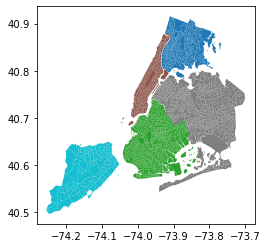

In [45]:
fullctd.plot(column='Borough')

## Analysis and Visualization

The fullctd dataset contains information on population changes from 2010 to 2020. This data will be helpful for visualizing whether the threat and impacts of sea level rise are affecting shoreline community populations.

In [55]:
fullctd['Population Percent Change'].describe()

count    2267.000000
mean       23.853639
std       251.491940
min      -100.000000
25%         1.200000
50%         6.200000
75%        11.900000
max      8983.300000
Name: Population Percent Change, dtype: float64

<AxesSubplot:xlabel='Borough', ylabel='Population Percent Change'>

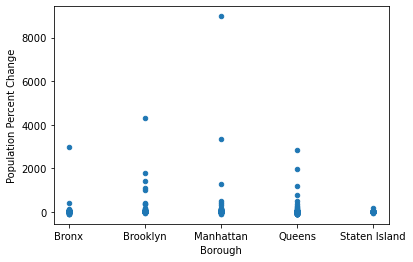

In [83]:
fullctd.plot.scatter(x='Borough', y='Population Percent Change')

<AxesSubplot:>

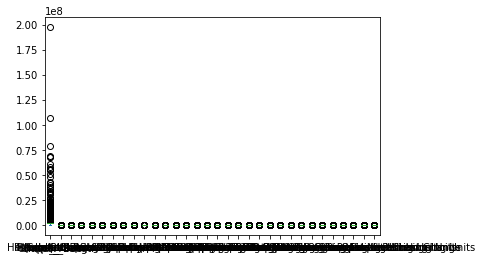

In [81]:
fullctd.plot.box()

In [61]:
bins = [-10, -5, 0, 5, 10, 100]

<AxesSubplot:>

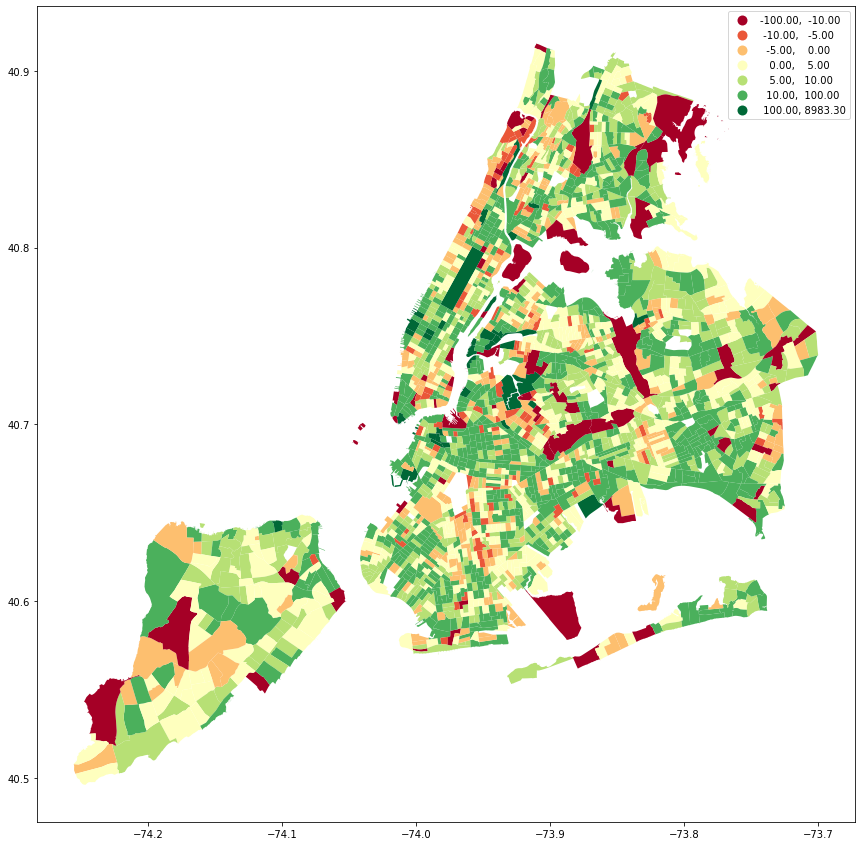

In [71]:
fullctd.plot(column='Population Percent Change', cmap='RdYlGn', scheme='user_defined', classification_kwds={'bins':bins}, legend=True, figsize=(15,15))

In [86]:
fullctd['Percent Change in Occupied Housing Units'].describe()

count    2259.000000
mean       19.235591
std       154.633360
min      -100.000000
25%         1.600000
50%         5.300000
75%        11.200000
max      3916.700000
Name: Percent Change in Occupied Housing Units, dtype: float64

<AxesSubplot:>

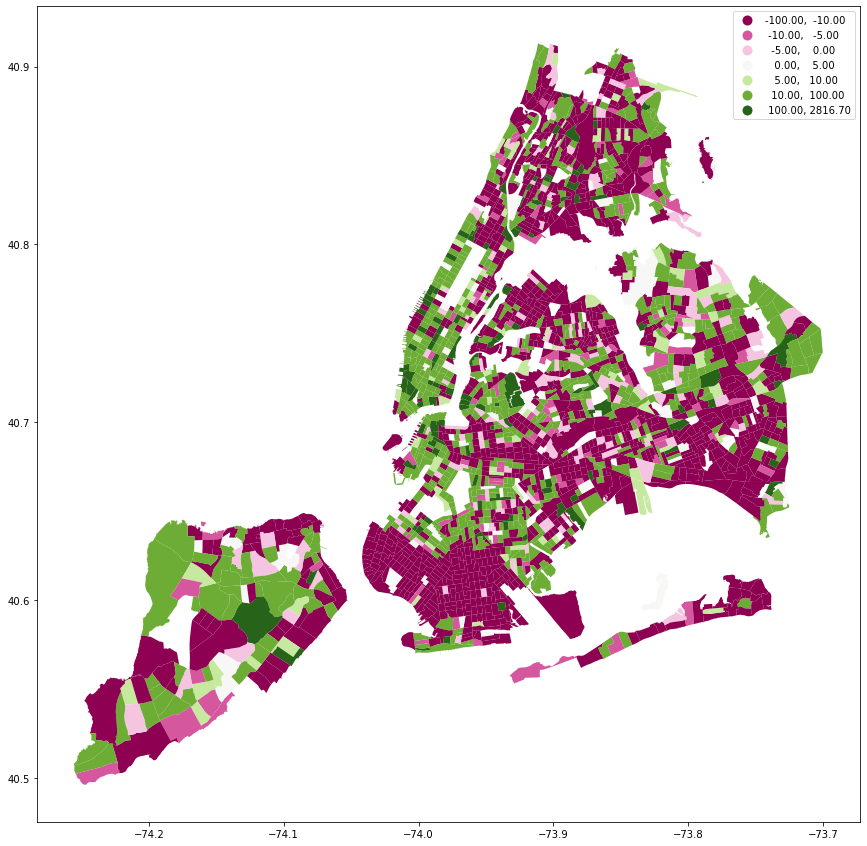

In [85]:
fullctd.plot(column='Percent Change in Occupied Housing Units', cmap='PiYG', scheme='user_defined', classification_kwds={'bins':bins}, legend=True, figsize=(15,15))